In [106]:
import mne

import numpy as np

import matplotlib.pyplot as plt

In [144]:

raw = mne.io.read_raw_eeglab('/Users/elizavetabeltyukova/Desktop/UCSD/bipn162/EarEEG_2017/sub-001/ses-001/eeg/sub-001_ses-001_task-sleep_eeg.set', 
preload=False)


Reading /Users/elizavetabeltyukova/Desktop/UCSD/bipn162/EarEEG_2017/sub-001/ses-001/eeg/sub-001_ses-001_task-sleep_eeg.fdt


In [147]:
raw_wake = mne.io.read_raw_eeglab('/Users/elizavetabeltyukova/Desktop/UCSD/bipn162/EarEEG_2017/sub-001/ses-001/wake/sub-001_ses-001_task-wake_eeg.set', 
preload=True)

FileNotFoundError: Could not find the .fdt data file, tried /Users/elizavetabeltyukova/Desktop/UCSD/bipn162/EarEEG_2017/sub-001/ses-001/wake/sub-001_ses-001_task-sleep_eeg.fdt and /Users/elizavetabeltyukova/Desktop/UCSD/bipn162/EarEEG_2017/sub-001/ses-001/wake/sub-001_ses-001_task-wake_eeg.fdt.

In [108]:
eeg_data = raw.get_data()

In [109]:
eeg_data

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.19187286e-04, -2.17326385e-04, -2.16528870e-04, ...,
         1.32921338e-07,  1.32921338e-07,  1.32921338e-07],
       [ 3.36291008e-05,  3.65533676e-05,  3.49583130e-05, ...,
         1.32921338e-07,  1.32921338e-07,  1.32921338e-07],
       ...,
       [ 1.54879072e-02,  1.57930879e-02,  1.53353174e-02, ...,
         7.62951126e-05,  7.62951126e-05,  7.62951126e-05],
       [ 1.57930879e-02,  1.54879072e-02,  1.53353174e-02, ...,
         7.62951126e-05,  7.62951126e-05,  7.62951126e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.12000000e-04,  5.12000000e-04,  5.12000000e-04]])

In [110]:
raw.ch_names

['Event',
 'C3',
 'O1',
 'A1',
 'F3',
 'LOC',
 'ELA',
 'ELE',
 'ELI',
 'ERA',
 'ERG',
 'ERE',
 'ERI',
 'ELB1',
 'C4',
 'O2',
 'A2',
 'F4',
 'ROC',
 'ELB',
 'ELG',
 'ELK',
 'ERB',
 'ERK',
 'ERB1',
 'CHIN12',
 'DIF2',
 'DIF3',
 'DIF4',
 'DC1',
 'DC2',
 'DC3',
 'DC4',
 'OSAT']

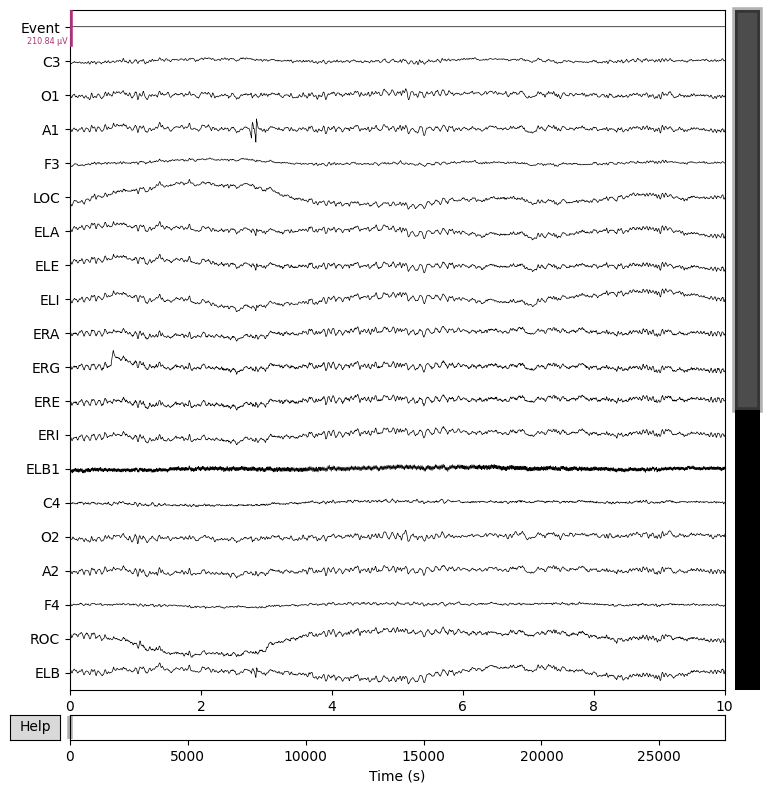

In [ ]:
raw.plot(scalings="auto")
raw_wake.plot(scalings='auto')
plt.show()
#raw.plot()[0] # Plot raw data


In [112]:
montage = raw.get_montage()

if montage is None:
    print("No montage is set for this data.")
else:
    # Access positions of channels and fiducials
    positions = montage.get_positions()
    print("Channel positions:", positions['ch_pos'])  # Channel positions
    print("Fiducials:", positions['nasion'], positions['lpa'], positions['rpa'])  # Fiducial points

Channel positions: OrderedDict([('Event', array([nan, nan, nan])), ('C3', array([nan, nan, nan])), ('O1', array([nan, nan, nan])), ('A1', array([nan, nan, nan])), ('F3', array([nan, nan, nan])), ('LOC', array([nan, nan, nan])), ('ELA', array([nan, nan, nan])), ('ELE', array([nan, nan, nan])), ('ELI', array([nan, nan, nan])), ('ERA', array([nan, nan, nan])), ('ERG', array([nan, nan, nan])), ('ERE', array([nan, nan, nan])), ('ERI', array([nan, nan, nan])), ('ELB1', array([nan, nan, nan])), ('C4', array([nan, nan, nan])), ('O2', array([nan, nan, nan])), ('A2', array([nan, nan, nan])), ('F4', array([nan, nan, nan])), ('ROC', array([nan, nan, nan])), ('ELB', array([nan, nan, nan])), ('ELG', array([nan, nan, nan])), ('ELK', array([nan, nan, nan])), ('ERB', array([nan, nan, nan])), ('ERK', array([nan, nan, nan])), ('ERB1', array([nan, nan, nan])), ('CHIN12', array([nan, nan, nan])), ('DIF2', array([nan, nan, nan])), ('DIF3', array([nan, nan, nan])), ('DIF4', array([nan, nan, nan])), ('DC1', a

In [113]:
print(raw.ch_names)

['Event', 'C3', 'O1', 'A1', 'F3', 'LOC', 'ELA', 'ELE', 'ELI', 'ERA', 'ERG', 'ERE', 'ERI', 'ELB1', 'C4', 'O2', 'A2', 'F4', 'ROC', 'ELB', 'ELG', 'ELK', 'ERB', 'ERK', 'ERB1', 'CHIN12', 'DIF2', 'DIF3', 'DIF4', 'DC1', 'DC2', 'DC3', 'DC4', 'OSAT']


In [114]:
# keeping the scalp channels placed according to the 10-20 channel naming convention 
electrodes_to_keep = ['O1', 'O2', 'C3', 'C4', 'A1', 'A2', 'F3', 'F4']

raw_scalp = raw.copy().pick(electrodes_to_keep)

raw_scalp_wake = raw_wake.copy().pick(electrodes_to_keep)

print(raw_scalp.ch_names)

['O1', 'O2', 'C3', 'C4', 'A1', 'A2', 'F3', 'F4']


In [115]:
from mne.channels import make_standard_montage

montage = mne.channels.make_standard_montage('standard_1020')
raw_scalp.set_montage(montage, match_case=False)  # Ensure channel names match

<RawEEGLAB | sub-001_ses-001_task-sleep_eeg.fdt, 8 x 5557600 (27788.0 s), ~339.2 MB, data loaded>

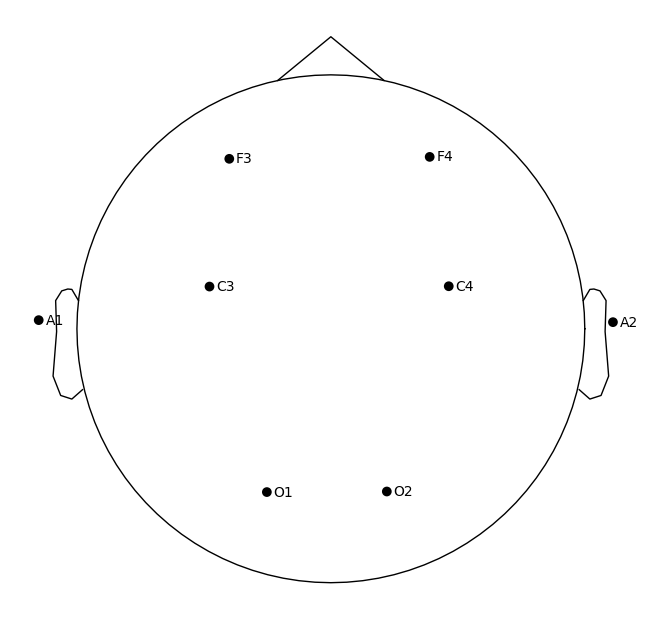

In [116]:
raw_scalp.plot_sensors(show_names=True)
plt.show()


- visualize electrodes that are next to the sleep and wakefullnes switch areas
- see if i can identify sleep stages
- 

In [121]:
# Re-reference to average (common for EEG analysis)
raw_scalp.set_eeg_reference('average')

# Optional: Apply bandpass filter (e.g., 1-40 Hz)
raw_scalp.filter(0.7, 2, fir_design='firwin')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.7 - 2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.70
- Lower transition bandwidth: 0.70 Hz (-6 dB cutoff frequency: 0.35 Hz)
- Upper passband edge: 2.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 943 samples (4.715 s)



<RawEEGLAB | sub-001_ses-001_task-sleep_eeg.fdt, 8 x 5557600 (27788.0 s), ~339.2 MB, data loaded>

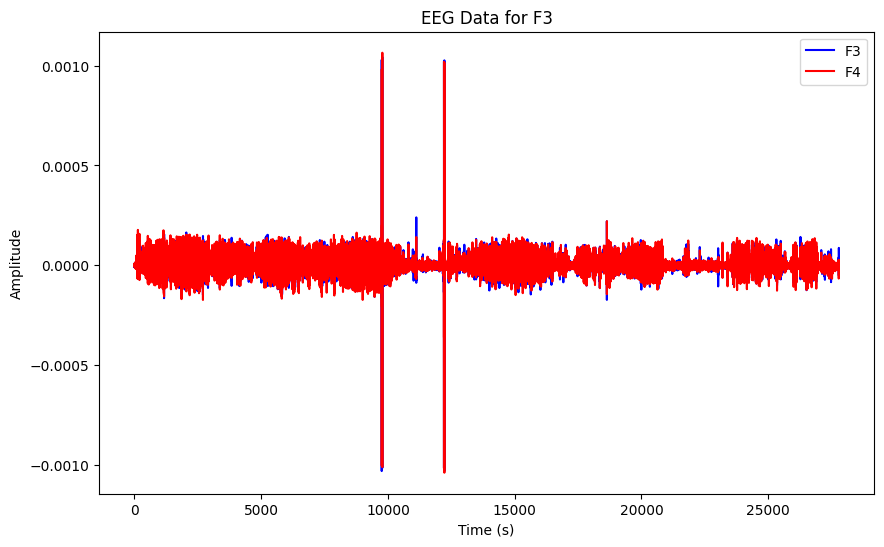

In [122]:
fig, ax = plt.subplots(figsize=(10, 6))

# Get the data for specific electrodes
data, times = raw_scalp.get_data(picks=['F3','F4'], return_times=True)

# Plot the data
ax.plot(times, data[0], color='blue', label='F3')
ax.plot(times, data[1], color='red', label='F4')

# Set labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('EEG Data for F3')
ax.legend()

# Show the plot
plt.show()
#raw_wake.plot(picks=['Fz', 'Cz'], ax=ax, color='red', show=False)

In [123]:
# Re-reference to average (common for EEG analysis)
raw_scalp_wake.set_eeg_reference('average')

# Optional: Apply bandpass filter (e.g., 1-40 Hz)
raw_scalp_wake.filter(0.7, 2, fir_design='firwin')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.7 - 2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.70
- Lower transition bandwidth: 0.70 Hz (-6 dB cutoff frequency: 0.35 Hz)
- Upper passband edge: 2.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 943 samples (4.715 s)



<RawEEGLAB | sub-001_ses-001_task-sleep_eeg.fdt, 8 x 2521600 (12608.0 s), ~153.9 MB, data loaded>

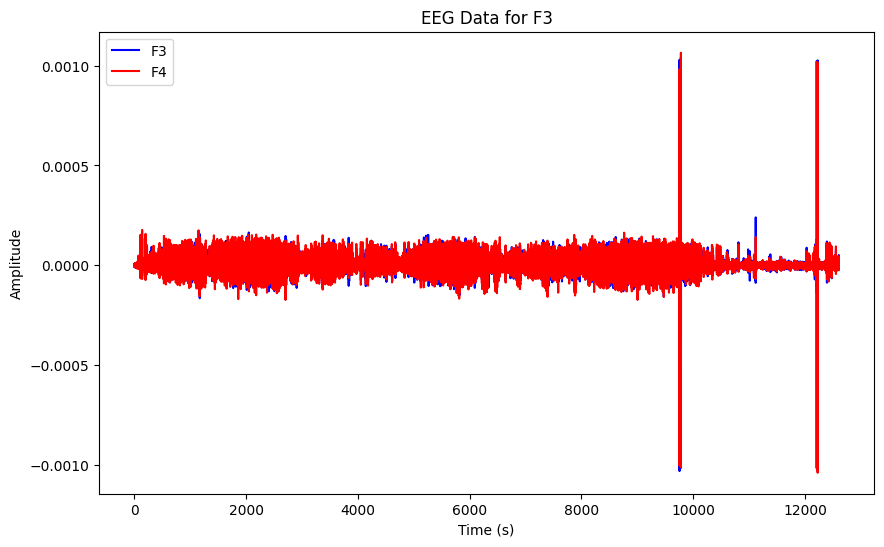

In [124]:
fig, ax = plt.subplots(figsize=(10, 6))

# Get the data for specific electrodes
data2, times = raw_scalp_wake.get_data(picks=['F3','F4'], return_times=True)

# Plot the data
ax.plot(times, data2[0], color='blue', label='F3')
ax.plot(times, data2[1], color='red', label='F4')

# Set labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('EEG Data for F3')
ax.legend()

# Show the plot
plt.show()

/var/folders/7r/dyjn5gtx12d21k4msl4lhlv80000gn/T/ipykernel_92701/83132543.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/var/folders/7r/dyjn5gtx12d21k4msl4lhlv80000gn/T/ipykernel_92701/83132543.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


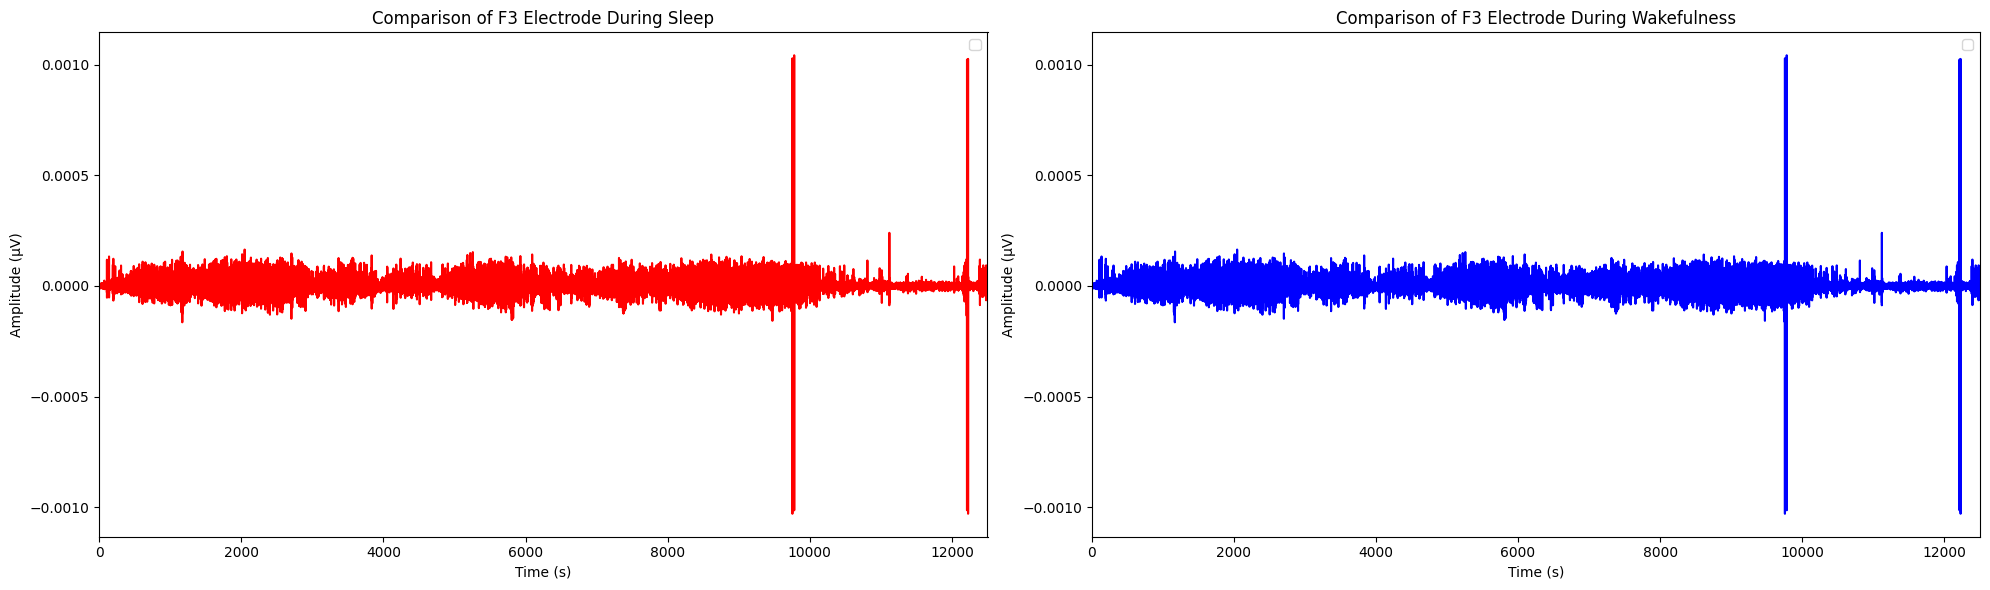

In [141]:
# fig, ax = plt.subplots(figsize=(10, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Get data and times for BOTH datasets
data_wake, times_wake = raw_scalp_wake.get_data(picks=['F3'], return_times=True)
data_scalp, times_scalp = raw_scalp.get_data(picks=['F3'], return_times=True)

# Configure plot
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude (μV)')
ax1.set_title('Comparison of F3 Electrode During Sleep')
ax1.legend()
ax1.set_xlim(0, 12500)  # Adjust if needed (now in seconds)
ax1.plot(times_scalp, data_scalp[0], color='red', label='F3 (Scalp)', alpha = 1)

# Plot each dataset with its own time vector

ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude (μV)')
ax2.set_title('Comparison of F3 Electrode During Wakefulness')
ax2.legend()
ax2.set_xlim(0, 12500)  # Adjust if needed (now in seconds)
ax2.plot(times_wake, data_wake[0], color='blue', label='F3 (Wake)', alpha = 1.0)

plt.tight_layout()
plt.show()